# Importing libraries and loading the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [4]:
df['account'].nunique()

100

In [5]:
data = df[["status","card_present_flag","balance","date",
                   "gender","age","merchant_suburb","merchant_state",
                   "amount","customer_id","movement"]]
data["date"] = pd.to_datetime(data["date"])
data.head()

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


Frequency of transactions on each date

In [6]:
data['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

Frequency of transactions made by each customer

In [7]:
data['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

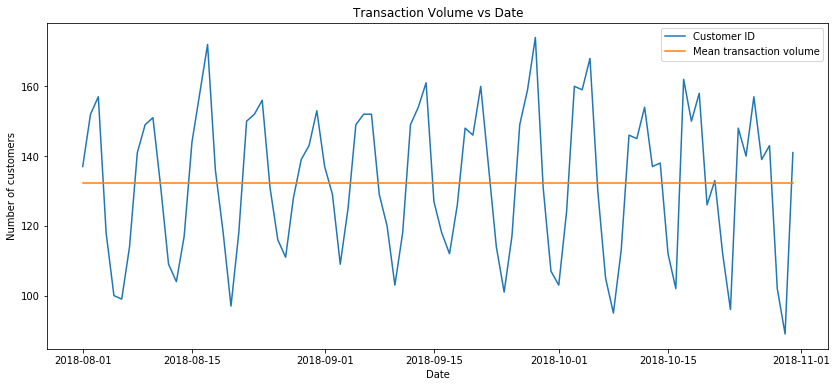

In [8]:
df_date_count = data.groupby("date").count()
trans_vol = df_date_count["customer_id"].mean()
n_points = len(df_date_count.index)

plt.figure(figsize=(14,6))
plt.plot(df_date_count.index, df_date_count["customer_id"],label = "Customer ID")
plt.plot(df_date_count.index, np.linspace(trans_vol,trans_vol,n_points), label = "Mean transaction volume")
plt.title("Transaction Volume vs Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")

plt.legend()
plt.show()

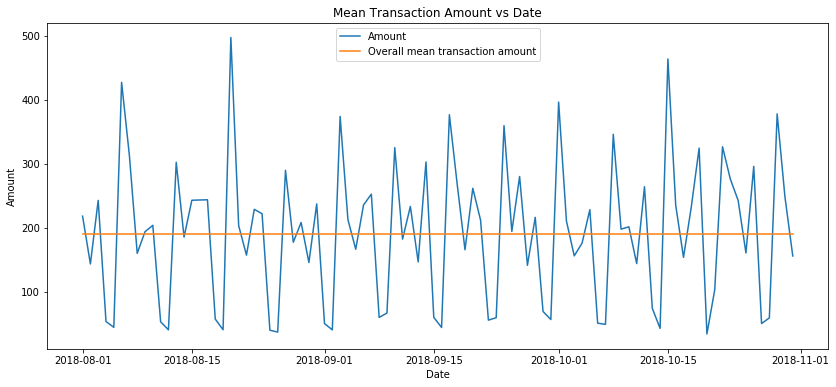

In [9]:
df_date_mean = data.groupby("date").mean()
trans_amt = df_date_mean["amount"].mean()
n_points = len(df_date_count.index)

plt.figure(figsize=(14,6))
plt.plot(df_date_count.index, df_date_mean["amount"], label = "Amount")
plt.plot(df_date_count.index, np.linspace(trans_amt,trans_amt,n_points),label = "Overall mean transaction amount")
plt.title("Mean Transaction Amount vs Date")
plt.xlabel("Date")
plt.ylabel("Amount")

plt.legend()
plt.show()

In [10]:
months = []
for date in data["date"]:
    if date.month == 8:
        months.append("August")
    elif date.month == 9:
        months.append("September")
    elif date.month == 10:
        months.append("October")

data["Months"] = months
data["Months"].unique()

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


array(['August', 'September', 'October'], dtype=object)

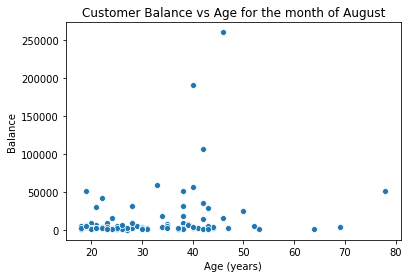

In [11]:
data_cus_aug = data[data['Months'] == 'August'].groupby('customer_id').mean()
data_gender_aug = data[data['Months'] == 'August'].groupby('gender').mean()
sns.scatterplot(data_cus_aug['age'], data_cus_aug['balance'])
plt.title("Customer Balance vs Age for the month of August")
plt.xlabel("Age (years)")
plt.ylabel("Balance")
plt.show()

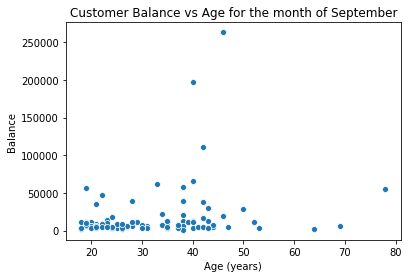

In [12]:
data_cus_sep = data[data['Months'] == 'September'].groupby('customer_id').mean()
data_gender_sep = data[data['Months'] == 'September'].groupby('gender').mean()
sns.scatterplot(data_cus_sep['age'], data_cus_sep['balance'])
plt.title("Customer Balance vs Age for the month of September")
plt.xlabel("Age (years)")
plt.ylabel("Balance")
plt.show()

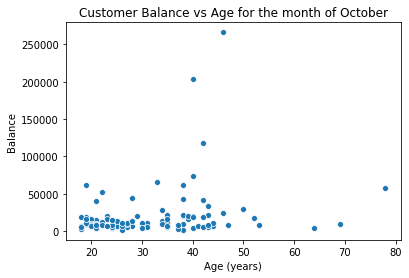

In [13]:
data_cus_oct = data[data['Months'] == 'October'].groupby('customer_id').mean()
data_gender_oct = data[data['Months'] == 'October'].groupby('gender').mean()
sns.scatterplot(data_cus_oct['age'], data_cus_oct['balance'])
plt.title("Customer Balance vs Age for the month of October")
plt.xlabel("Age (years)")
plt.ylabel("Balance")
plt.show()

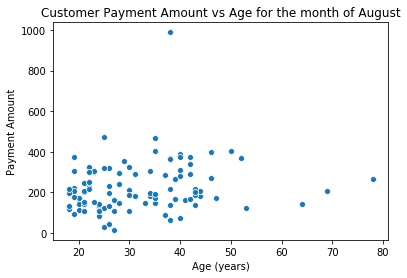

In [14]:
data_cus_aug = data[data['Months'] == 'August'].groupby('customer_id').mean()
data_gender_aug = data[data['Months'] == 'August'].groupby('gender').mean()
sns.scatterplot(data_cus_aug['age'], data_cus_aug['amount'])
plt.title("Customer Payment Amount vs Age for the month of August")
plt.xlabel("Age (years)")
plt.ylabel("Payment Amount")
plt.show()

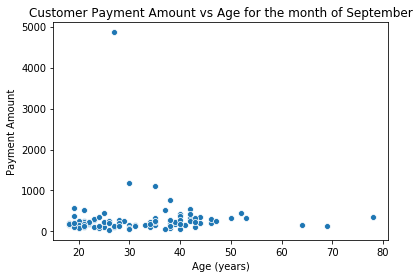

In [15]:
data_cus_aug = data[data['Months'] == 'September'].groupby('customer_id').mean()
data_gender_aug = data[data['Months'] == 'September'].groupby('gender').mean()
sns.scatterplot(data_cus_aug['age'], data_cus_aug['amount'])
plt.title("Customer Payment Amount vs Age for the month of September")
plt.xlabel("Age (years)")
plt.ylabel("Payment Amount")
plt.show()

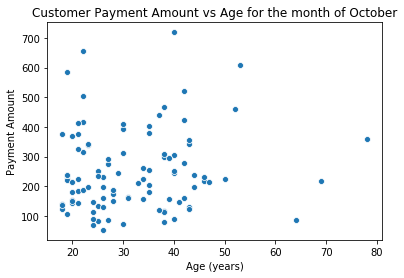

In [16]:
data_cus_aug = data[data['Months'] == 'October'].groupby('customer_id').mean()
data_gender_aug = data[data['Months'] == 'October'].groupby('gender').mean()
sns.scatterplot(data_cus_aug['age'], data_cus_aug['amount'])
plt.title("Customer Payment Amount vs Age for the month of October")
plt.xlabel("Age (years)")
plt.ylabel("Payment Amount")
plt.show()

Total transaction by Gender

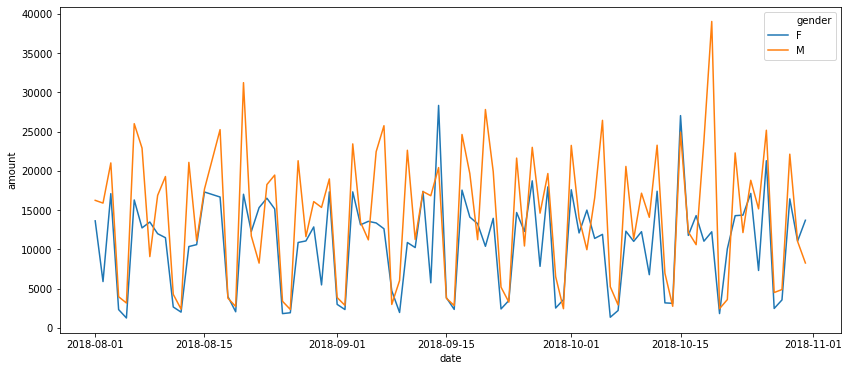

In [17]:
gender_vol = data[["date","amount","gender"]]
gender_data = gender_vol.groupby(['date',"gender"])["amount"].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(y="amount",x="date",hue="gender",data=gender_data)
plt.show()

Mean transaction amount by gender

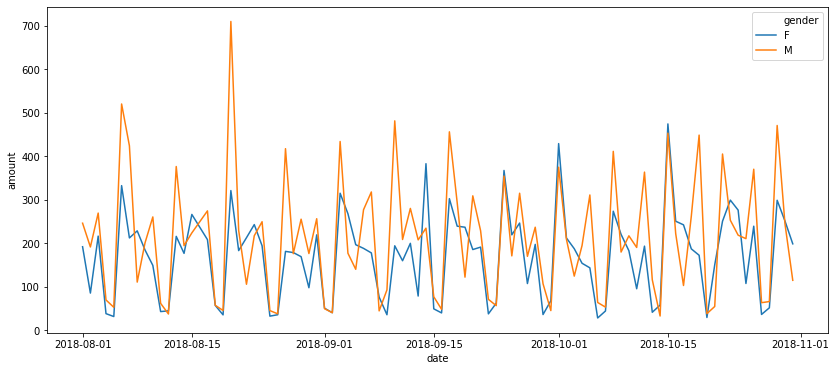

In [18]:
gender_mean = data.groupby(["date","gender"])["amount"].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(y="amount",x="date",hue="gender", data=gender_mean)

Transaction Volume by merchant state

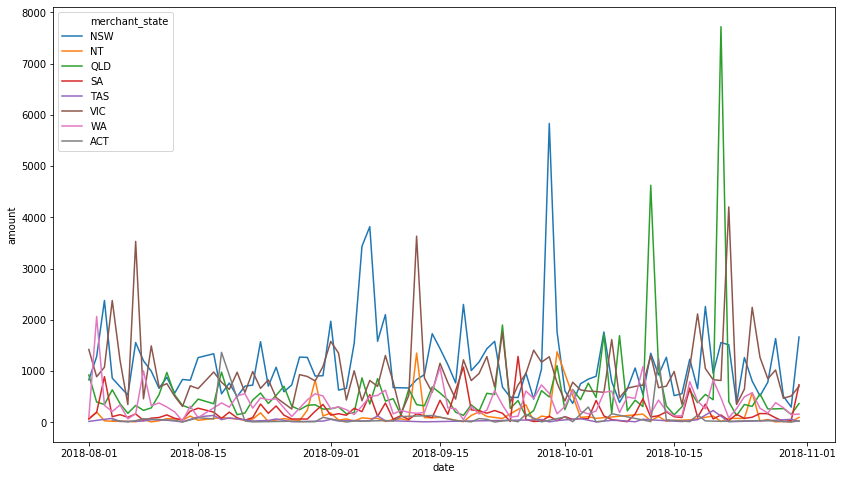

In [19]:
merchant_state = data.groupby(["date","merchant_state"])["amount"].sum().reset_index()
plt.figure(figsize=(14,8))
sns.lineplot(y="amount",x="date",hue="merchant_state", data=merchant_state)

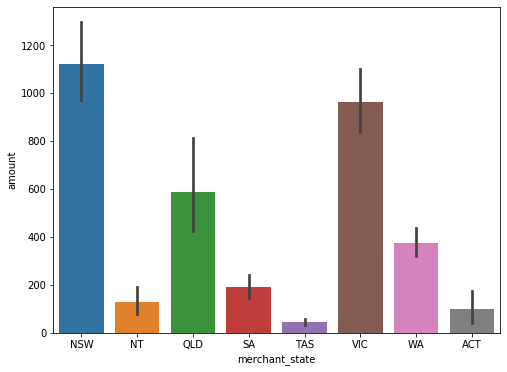

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(y="amount", x="merchant_state", data=merchant_state)

Credit-Debit transaction total by gender

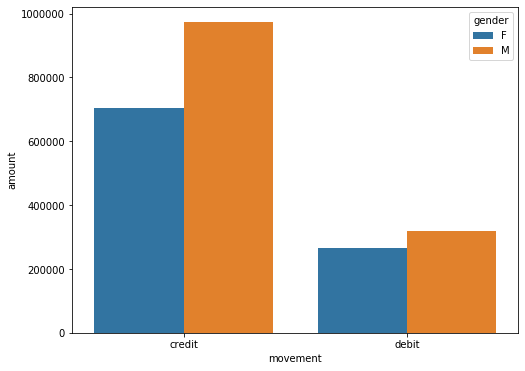

In [21]:
debit_credit_total= data.groupby(["movement","gender"])["amount"].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(y="amount", x="movement", hue="gender", data=debit_credit_total)

Total Transaction by Age

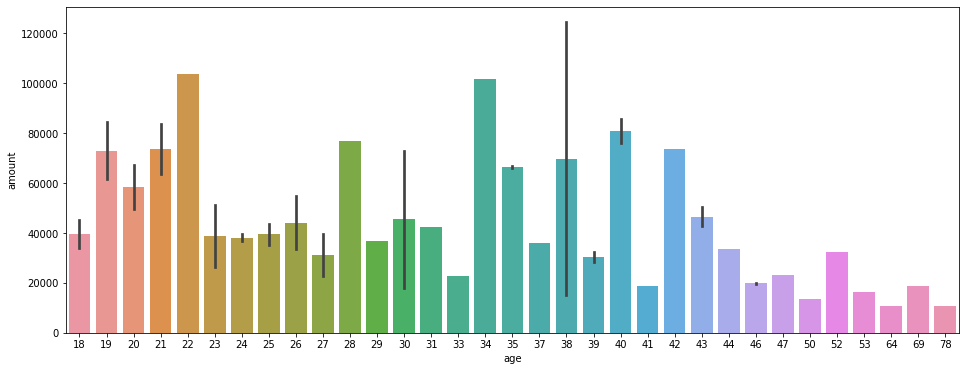

In [22]:
age_amount_sum= data.groupby(['age',"gender"])["amount"].sum().reset_index()
plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age",  data=age_amount_sum)